<center><h1> Pycaret Introduction</h1></center>



You can reach pycaret website and documentation from https://pycaret.org

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code.

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.

## First instal Pycaret

In [34]:
!pip install pycaret

<h2>This notebook consists 2 parts</h2>
<p> Anomaly Detection with pycaret inbuild_data {Clustering}</p>
<p> Use case: Credit Card Fraudulent detection {Classification}</p>

## Part 1 : Anomaly Detection

In [9]:
#import the dataset from pycaret repository
from pycaret.datasets import get_data
data = get_data('anomaly')

#import anomaly detection module
from pycaret.anomaly import *

#intialize the setup
exp_ano = setup(data)


Setup Succesfully Completed!


,Description,Value
0,session_id,4780
1,Original Data,"(1000, 10)"
2,Missing Values,False
3,Numeric Features,10
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(1000, 10)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


This function initializes the environment in pycaret. setup() must called before executing any other function in pycaret. It takes one mandatory parameter: dataframe {array-like, sparse matrix}   

## Create  Model

create_model():
This function creates a model on the dataset passed as a data param during the setup stage. setup() function must be called before using create_model(). This function returns a trained model object.

In [10]:
knn_model = create_model('knn') #k nearest neighbour

# assign a model 
knn_df = assign_model(knn_model) 

## Plot the model

In [11]:
plot_model(knn_model)

# Let's predict it!

In [12]:
# generate predictions using trained model
knn_predictions = predict_model(knn_model, data = data)
knn_predictions

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Label,Score
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591,0,0.558927
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422,0,0.477482
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600,0,0.676207
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463,1,0.804769
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754,0,0.630836
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,0,0.266822
996,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,0,0.403480
997,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,0,0.337727
998,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,0,0.300265


## Part 2: Credit Card Fraudulent detection

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/creditcardfraud/creditcard.csv


## Reading our Data

In [16]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")


## Import whole Classification

In [39]:
from pycaret.classification import *

# Understanding the Data

In [17]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

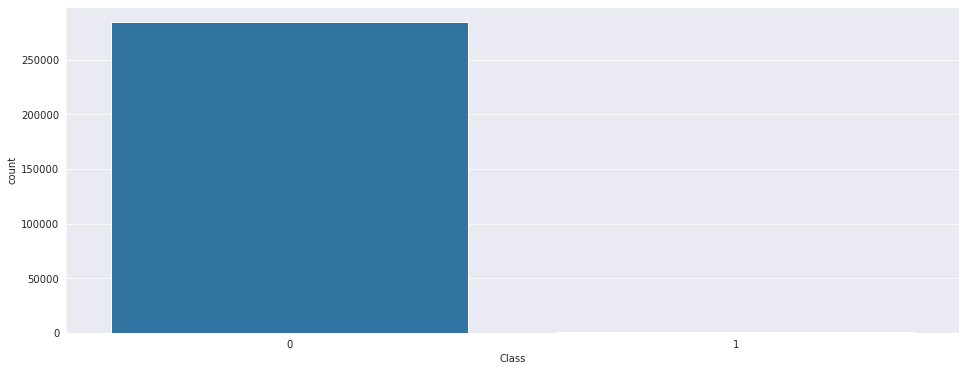

In [19]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,6))

import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Class',data=data)

1 = Fradulent, 
0 = not Fradulent

In [20]:
print(len(data[data['Class']==1]))
print(len(data[data['Class']==0]))

492
284315


## Balancing the data
We can clearly see , the dataset is very imbalanced. I am going to apply undersampling technique to balance the dataset
#### Under Sampling
<b>Over sampling</b> and <b>under sampling</b> are techniques used in data mining and data analytics to modify unequal data classes to create balanced data sets. If a class of data is the overrepresented majority class, under sampling may be used to balance it with the minority class. Under sampling is used when the amount of collected data is sufficient. Common methods of under sampling include cluster centroids and Tomek links, both of which target potential overlapping characteristics within the collected data sets to reduce the amount of majority data.

In [3]:
!pip install imbalanced-learn

In [4]:
x=data.drop('Class',axis=1)
y=data.Class

In [5]:
from imblearn.under_sampling import NearMiss
under_sampler = NearMiss()
x_res,y_res = under_sampler.fit_sample(x,y)


In [6]:
from collections import Counter
print("before oversampling:",Counter(y))
print("after oversampling:",Counter(y_res))

before oversampling: Counter({0: 284315, 1: 492})
after oversampling: Counter({0: 492, 1: 492})


In [7]:
y_res

0      0
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Name: Class, Length: 984, dtype: int64

## Set up our dataset

In [28]:
x_res=pd.concat([x_res,y_res],axis=1)
x_res.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,76866.0,1.257227,0.408096,0.319266,0.685011,-0.302937,-1.052552,0.136991,-0.245655,-0.079491,...,-0.279430,-0.770134,0.119789,0.360130,0.241921,0.092261,-0.018228,0.032361,1.78,0
1,76868.0,1.254775,0.375340,0.311959,0.691077,-0.343494,-1.065252,0.110222,-0.222721,-0.017278,...,-0.283275,-0.803506,0.124643,0.354395,0.226835,0.093208,-0.021100,0.031686,2.69,0
2,76870.0,-1.050697,1.500753,0.846326,-0.282956,0.059866,-0.561182,0.484517,0.181547,0.081544,...,-0.335560,-0.780232,-0.027029,-0.090180,-0.022896,0.091830,0.547241,0.278780,1.29,0
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,0.035687,0.186705,-0.107300,0.417887,0.712330,-0.330843,0.018576,0.021871,3.99,0
4,76870.0,1.261137,0.304662,0.527018,0.612765,-0.411488,-0.972770,0.112838,-0.248052,-0.068454,...,-0.249081,-0.683649,0.126936,0.395307,0.243448,0.092344,-0.024149,0.020589,1.79,0


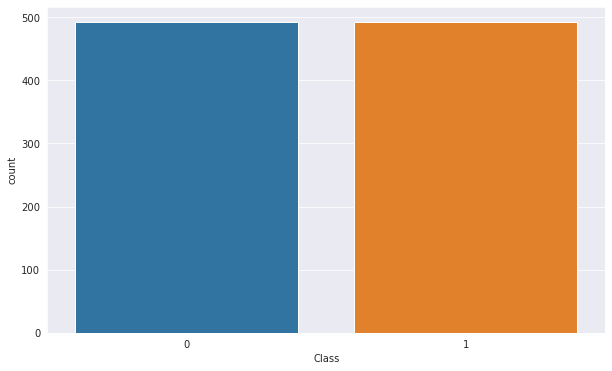

In [44]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))

import seaborn as sns
sns.set_style('darkgrid')
sns.countplot(x='Class',data=x_res)

In [46]:
classifier = setup(data=x_res,target='Class')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1199
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(984, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [38]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 2.6 MB/s eta 0:00:01
ERROR: tpot 0.11.5 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: pycaret 1.0.0 has requirement scikit-learn==0.22, but you'll have scikit-learn 0.23.1 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement imbalanced-learn<0.5,>=0.4.0, but you'll have imbalanced-learn 0.7.0 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement numpy<1.16,>=1.13, but you'll have numpy 1.18.5 which is incompatible.
ERROR: kmeans-smote 0.1.2 has requirement scikit-learn<0.21,>=0.19.0, but you'll have scikit-learn 0.23.1 which is incompatible.
ERROR: hypertools 0.6.2 has requirement scikit-learn<0.22,>=0.19.1, but you'll have scikit-learn 0.23.1 which is incompatible.
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


## Compare the models

In [41]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.969500,0.994900,0.950400,0.988000,0.968300,0.938900
1,Gradient Boosting Classifier,0.965100,0.994000,0.944700,0.985100,0.964000,0.930200
2,Decision Tree Classifier,0.963700,0.963700,0.959200,0.969400,0.963800,0.927400
3,Ada Boost Classifier,0.962200,0.988300,0.947600,0.976400,0.961300,0.924400
4,CatBoost Classifier,0.962200,0.994100,0.938700,0.985000,0.960500,0.924400
5,Logistic Regression,0.959300,0.990100,0.944600,0.974700,0.958200,0.918600
6,Extreme Gradient Boosting,0.957800,0.993200,0.938900,0.976400,0.956500,0.915700
7,Extra Trees Classifier,0.956400,0.989300,0.930200,0.982100,0.954500,0.912800
8,Random Forest Classifier,0.950600,0.987000,0.924200,0.976100,0.948400,0.901100
9,Quadratic Discriminant Analysis,0.930300,0.968400,0.912800,0.947100,0.928300,0.860500


From the above results , we can clearly see with Light Gradient Boosting Machine algorithm we got the highest accuracy, I am going to create a model with the LGBM

In [45]:
#creating the model
lightgbm_model= create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9855,1.0000,0.9714,1.0000,0.9855,0.9710
1,0.9565,0.9790,0.9143,1.0000,0.9552,0.9131
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9855,0.9992,0.9714,1.0000,0.9855,0.9710
4,0.9710,0.9992,0.9706,0.9706,0.9706,0.9420
5,0.9275,0.9916,0.8529,1.0000,0.9206,0.8547
6,0.9855,0.9958,0.9706,1.0000,0.9851,0.9710
7,0.9420,0.9966,0.9118,0.9688,0.9394,0.8839
8,0.9559,0.9879,0.9412,0.9697,0.9552,0.9118
9,0.9853,1.0000,1.0000,0.9714,0.9855,0.9706


In [47]:
print(lightgbm_model)

LGBMClassifier(random_state=4806)


## Learning curve

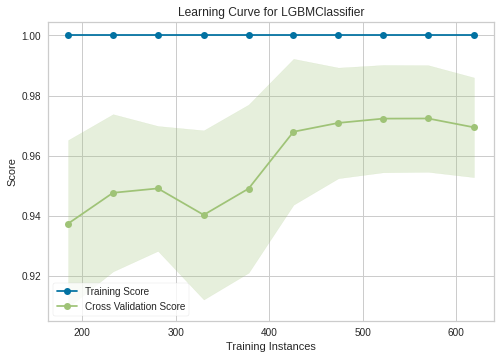

In [50]:
plot_model(lightgbm_model,plot='learning')

## Feature importance

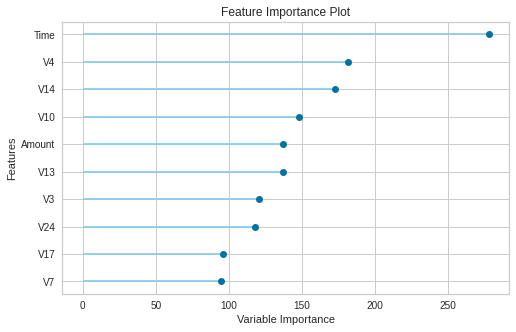

In [51]:
plot_model(lightgbm_model,plot='feature')

## confusion matrix

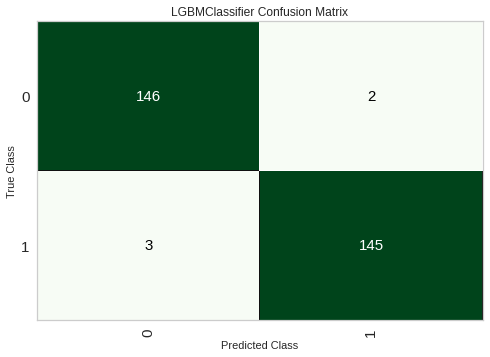

In [49]:
plot_model(lightgbm_model,plot='confusion_matrix')

## Classification Report

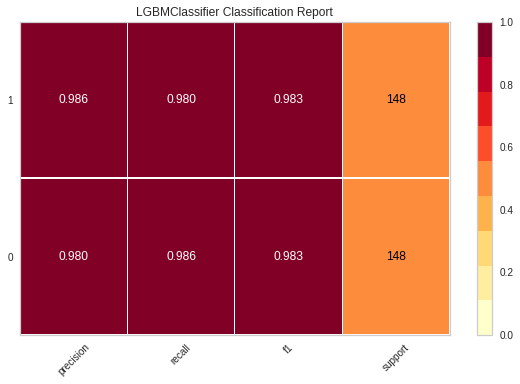

In [52]:
plot_model(lightgbm_model,plot='class_report')

## Class Prediction Error

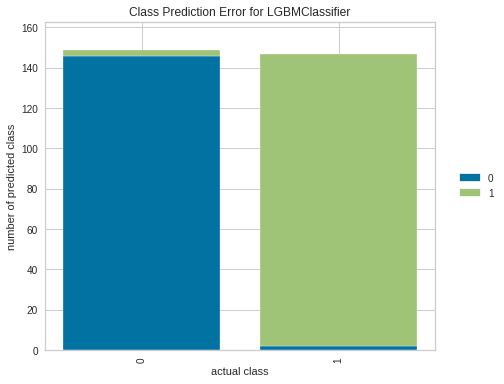

In [54]:
plot_model(lightgbm_model,plot='error')

## Correlation

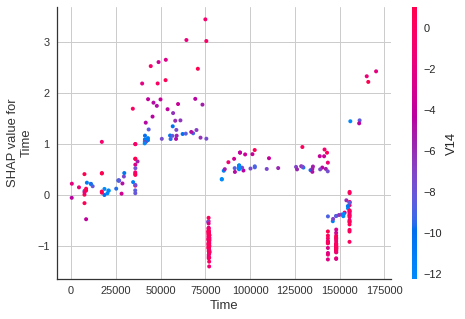

In [55]:
interpret_model(lightgbm_model, plot ='correlation', feature = None, observation = None)

# Interpretation

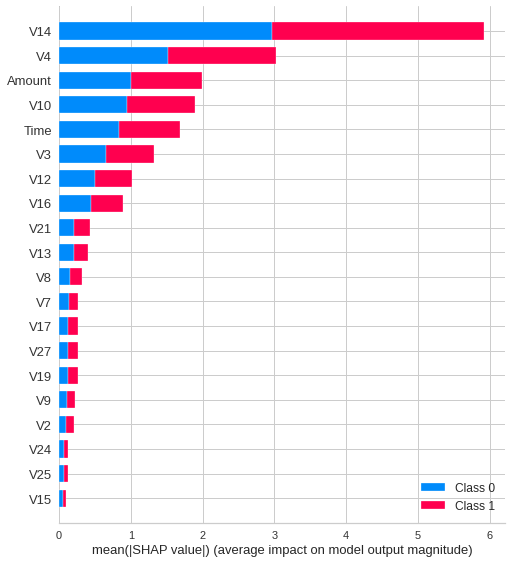

In [56]:
interpret_model(lightgbm_model)

# Thank you for reading my notebook,please upvote it if you like it